In [2]:
import GI_parser as GIP
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter
import glob
import time
import math

In [3]:
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum());
    return r

In [4]:
framebase=GIP.FrameBase("frames_b3_1W0028_F03-2.txt")

Beam1  (110, 110)  Beam2  (110, 110)
0.08263034401976717


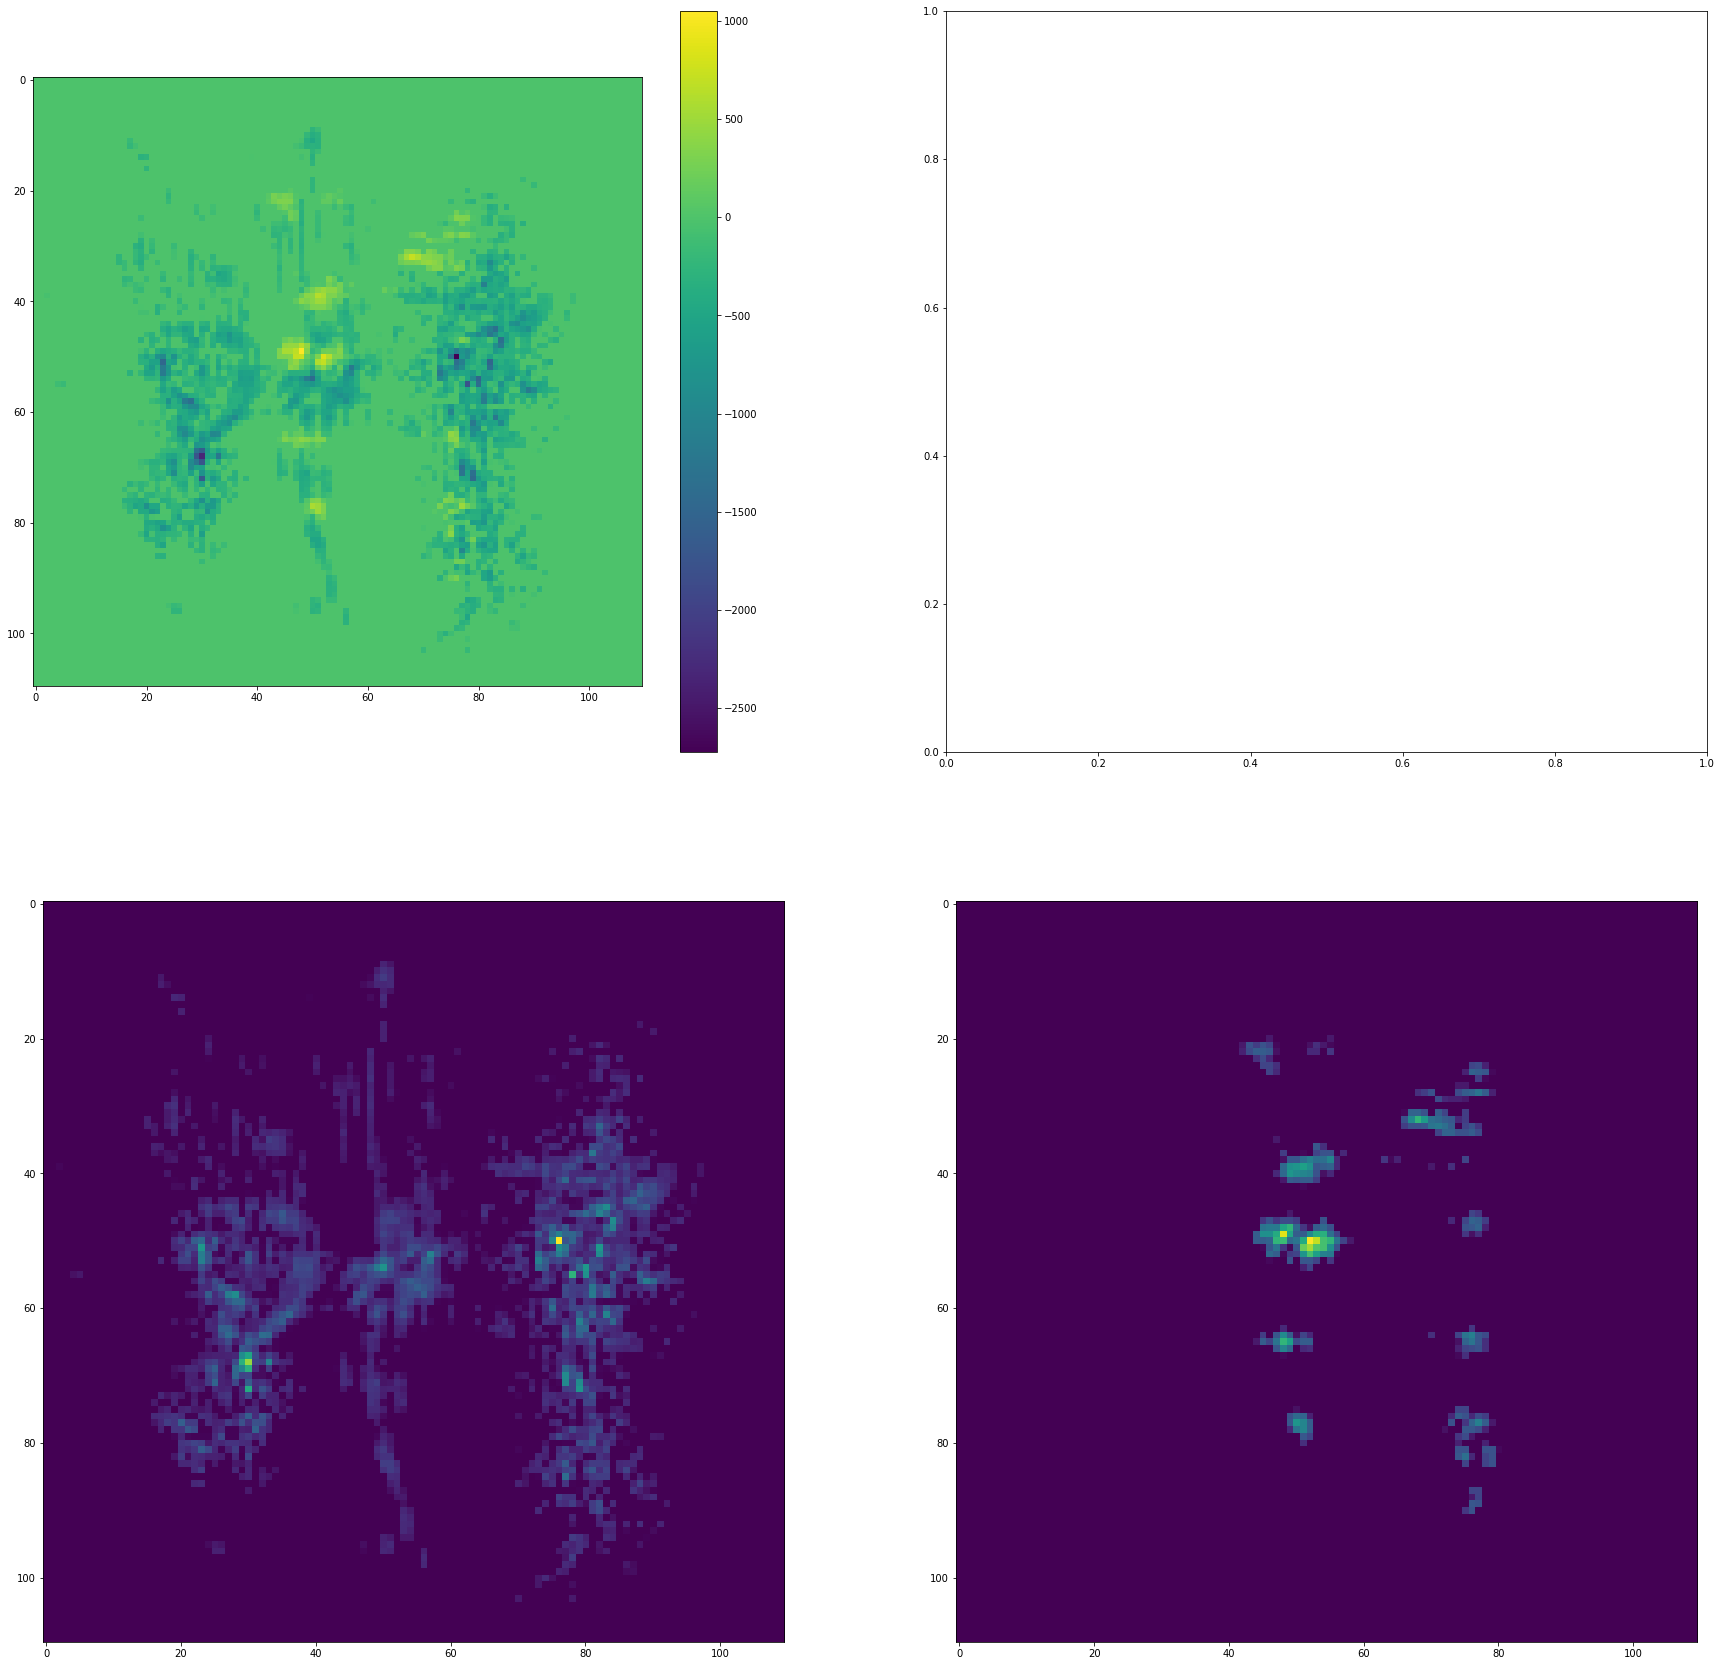

In [5]:
#Examine the frame

s1x1=120
s1x2=230

s1y1=140
s1y2=250

s2x1=28
s2x2=138

s2y1=21
s2y2=131



frame_index=5000


beam1=framebase[frame_index].data[s1x1:s1x2,s1y1:s1y2]
beam2=framebase[frame_index].data[s2x1:s2x2,s2y1:s2y2]



beam1_cp=np.copy(beam1)
beam2_cp=np.copy(beam2)

# for i in range(beam1_cp.shape[0]):
#     for j in range(beam1_cp.shape[0]):
#         if beam1_cp[i,j]<1100:
#             beam1_cp[i,j]=0
#         if beam2_cp[i,j]<1100:
#             beam2_cp[i,j]=0
            
          
overlap=beam1_cp-beam2_cp

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(30, 30))

_=ax[0,0].imshow(overlap) 
fig.colorbar(_,ax=ax[0,0])
ax[1,1].imshow(beam1)
ax[1,0].imshow(beam2)

print("Beam1 ",beam1.shape," Beam2 ",beam2.shape)
print(corr2(framebase[frame_index].data[s1x1:s1x2,s1y1:s1y2],framebase[frame_index].data[s2x1:s2x2,s2y1:s2y2]))

In [7]:
#GHOST IMAGING WOOOOOO



#Term 1, Term 2 and Term 3 refer to 3 summation terms in formula (3) in this paper: https://www.osapublishing.org/optica/viewmedia.cfm?uri=optica-5-4-374&seq=0


ghost=np.ndarray(shape=(110,110),dtype=np.float32)
term1_matrix=np.ndarray(shape=(110,110),dtype=np.float32)
term2_matrix=np.ndarray(shape=(110,110),dtype=np.float32)
term3_matrix=np.ndarray(shape=(110,110),dtype=np.float32)

s1x1=121
s1x2=231

s1y1=140
s1y2=250

s2x1=28
s2x2=138

s2y1=21
s2y2=131

nframes=10000

#The first 2 for loops go pixel by pixel

for i in range(beam1.shape[0]):
    for j in range(beam1.shape[1]):
        term1=0
        term2=0
        term3=0
        #This loop goes over 10000 frames
        for frame_ct in range(nframes):
            
            #This is I_i
            beam1_bucket=np.sum(framebase[frame_ct].data[s1x1:s1x2,s1y1:s1y2])
            
            #This is S_i
            beam2=framebase[frame_ct].data[s2x1:s2x2,s2y1:s2y2]
            #Where i is the index of a frame (frame_ct in code)
            #Note that this 'i' is not the same as  the 'i' in the first for-loop above. This 'i' is the x coordinate of the image
            
            
            
            
            term1+=beam1_bucket*beam2[i,j]
            term2+=beam1_bucket
            term3+=beam2[i,j]
            
            
        
        
        #After the three summations have been assembled, put them into formula (3) to produce the ghost image at the [i,j] coordinate 
        ghost[i,j]=term1/nframes-(term2*term3)/ (nframes ** 2)
        term1_matrix[i,j]=term1
        term2_matrix[i,j]=term2
        term3_matrix[i,j]=term3
        
        
        
    print ("i=",i,"/110")

    
np.savetxt("ghost.txt",ghost)
np.savetxt("term1.txt",term1_matrix)
np.savetxt("term2.txt",term2_matrix)
np.savetxt("term3.txt",term3_matrix)

i= 0 /110
i= 1 /110
i= 2 /110
i= 3 /110
i= 4 /110
i= 5 /110
i= 6 /110
i= 7 /110
i= 8 /110
i= 9 /110
i= 10 /110
i= 11 /110
i= 12 /110
i= 13 /110
i= 14 /110
i= 15 /110
i= 16 /110
i= 17 /110
i= 18 /110
i= 19 /110
i= 20 /110
i= 21 /110
i= 22 /110
i= 23 /110
i= 24 /110
i= 25 /110
i= 26 /110
i= 27 /110
i= 28 /110
i= 29 /110
i= 30 /110
i= 31 /110
i= 32 /110
i= 33 /110
i= 34 /110
i= 35 /110
i= 36 /110
i= 37 /110
i= 38 /110
i= 39 /110
i= 40 /110
i= 41 /110
i= 42 /110
i= 43 /110
i= 44 /110
i= 45 /110
i= 46 /110
i= 47 /110
i= 48 /110
i= 49 /110
i= 50 /110
i= 51 /110
i= 52 /110
i= 53 /110
i= 54 /110
i= 55 /110
i= 56 /110
i= 57 /110
i= 58 /110
i= 59 /110
i= 60 /110
i= 61 /110
i= 62 /110
i= 63 /110
i= 64 /110
i= 65 /110
i= 66 /110
i= 67 /110
i= 68 /110
i= 69 /110
i= 70 /110
i= 71 /110
i= 72 /110
i= 73 /110
i= 74 /110
i= 75 /110
i= 76 /110
i= 77 /110
i= 78 /110
i= 79 /110
i= 80 /110
i= 81 /110
i= 82 /110
i= 83 /110
i= 84 /110
i= 85 /110
i= 86 /110
i= 87 /110
i= 88 /110
i= 89 /110
i= 90 /110
i= 91 /11

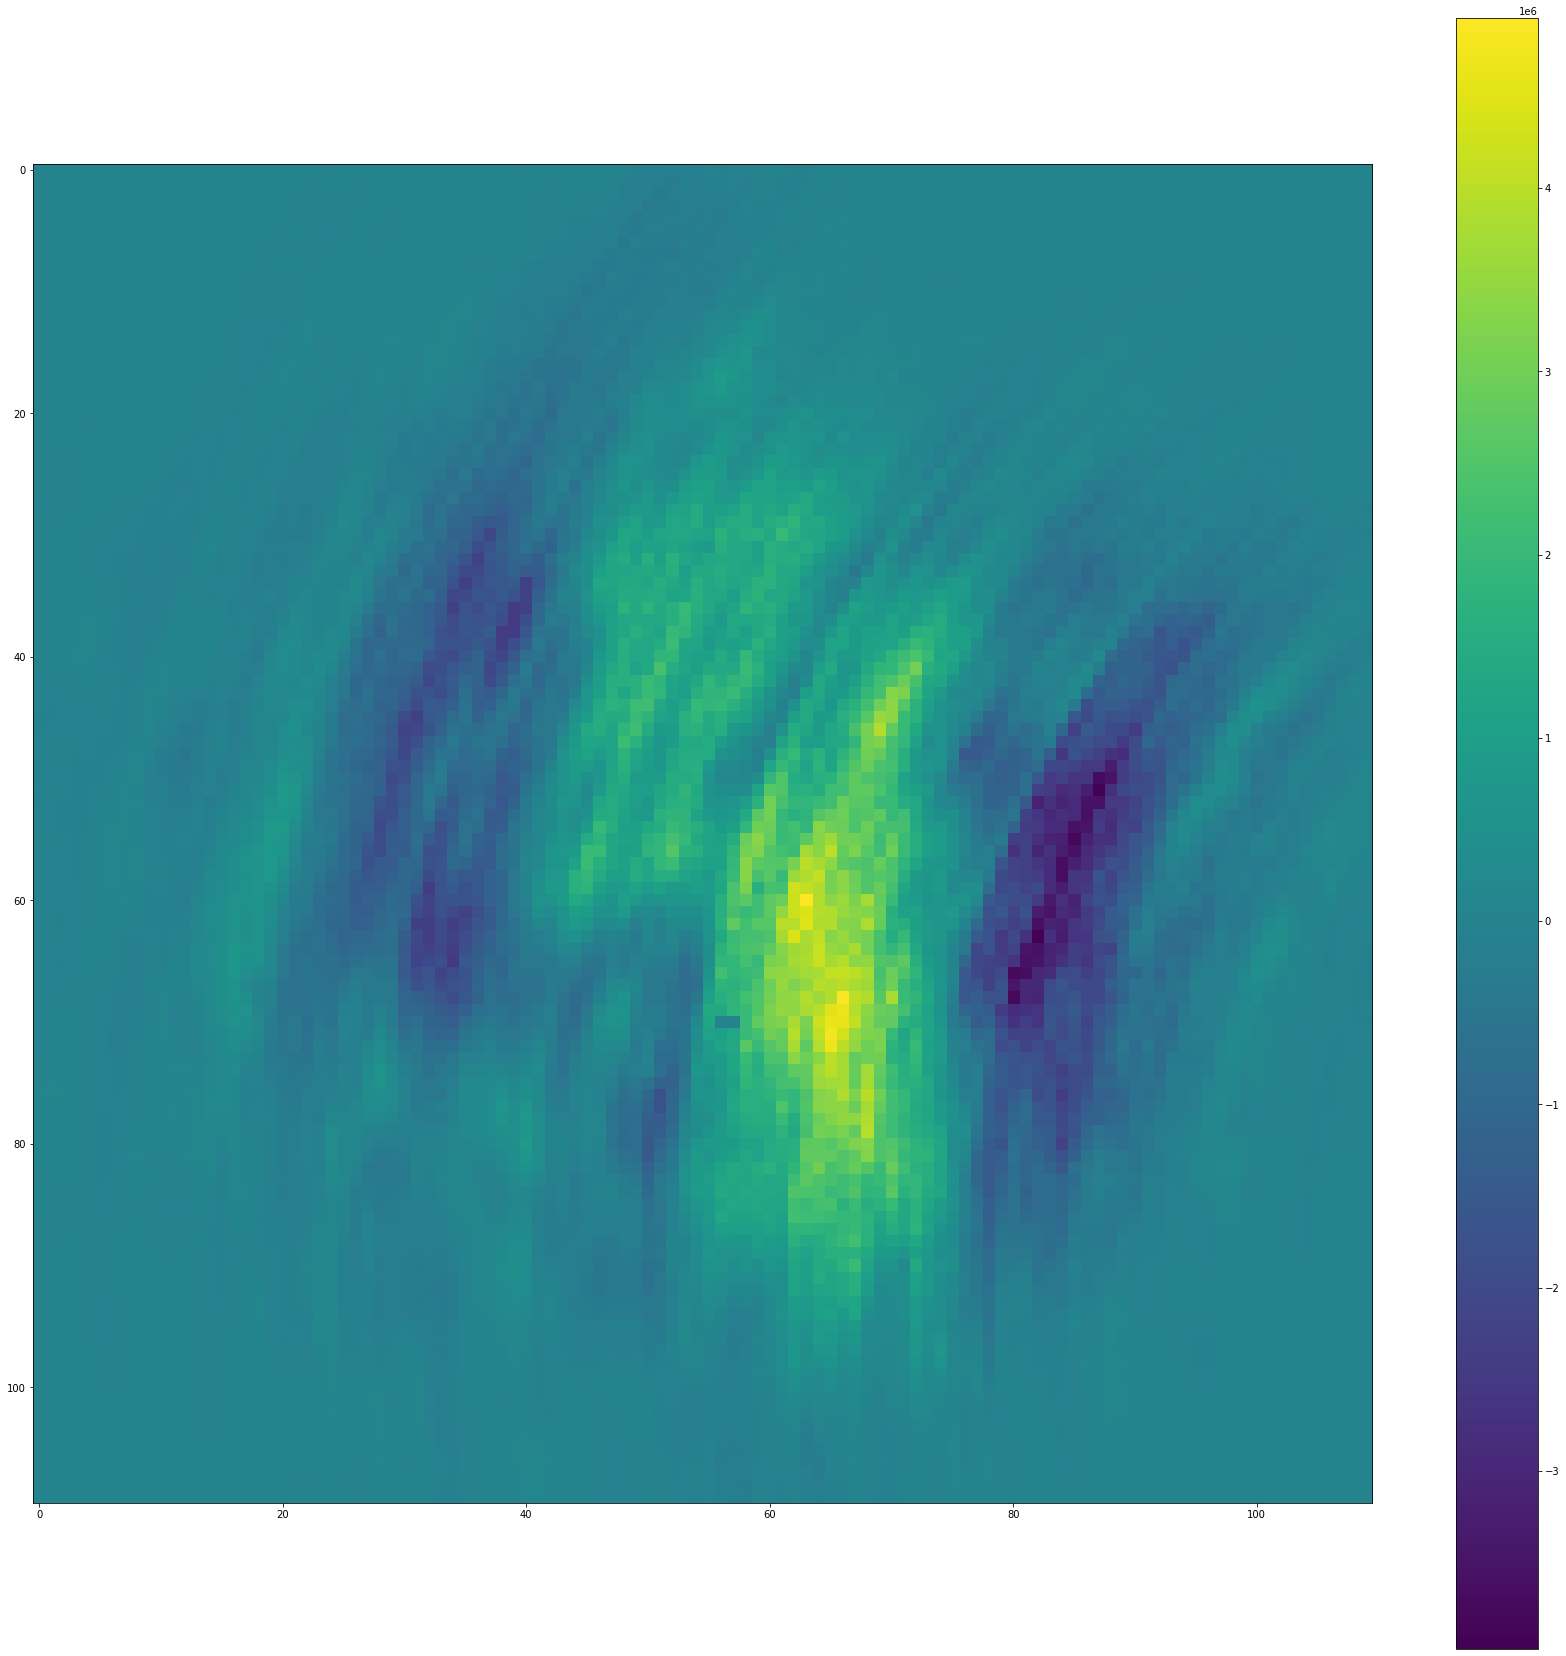

In [8]:
#Show the ghost
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(30, 30))
_=ax.imshow(ghost)
fig.colorbar(_)
